In [1]:
#importing packages
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import configparser


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

db_username = config['database']['username']
db_password = config['database']['password']
db_host = config['database']['host']
db_name = config['database']['database']
db_connection_string = f'postgresql://{db_username}:{db_password}@{db_host}/{db_name}'
engine = create_engine(db_connection_string)

In [3]:

students_query = 'SELECT * FROM students;'  
students_data = pd.read_sql(students_query, engine)


scores_query = 'SELECT * FROM exam_scores;'  
scores_data = pd.read_sql(scores_query, engine)

attendance_query = 'SELECT * FROM attendance;'  
attendance_data = pd.read_sql(attendance_query, engine)

In [4]:
data = pd.merge(students_data, scores_data, on='id', how='inner')
data = pd.merge(data, attendance_data, on='id', how='inner')

In [5]:
data.head()

,id,first_name,last_name,gender,part_time_job,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,absence_days
0,1,Adebayo,Adeyemi,male,False,False,27,Lawyer,73,81,93,97,63,80,87,3
1,2,Ayotunde,Ogunleye,female,False,False,47,Doctor,90,86,96,100,90,88,90,2
2,3,Funmilayo,Adeniyi,female,False,True,13,Government Officer,81,97,95,96,65,77,94,9
3,4,Oluwaseun,Alabi,female,False,False,3,Artist,71,74,88,80,89,63,86,5
4,5,Temidayo,Balogun,male,False,False,10,Unknown,84,77,65,65,80,74,76,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   extracurricular_activities  2000 non-null   bool  
 6   weekly_self_study_hours     2000 non-null   int64 
 7   career_aspiration           2000 non-null   object
 8   math_score                  2000 non-null   int64 
 9   history_score               2000 non-null   int64 
 10  physics_score               2000 non-null   int64 
 11  chemistry_score             2000 non-null   int64 
 12  biology_score               2000 non-null   int64 
 13  english_score               2000 non-null   int6

In [7]:
data.drop(columns= ["first_name", "last_name"], inplace=True)

In [8]:
data["id"] = data["id"].astype("O")

In [9]:
data.isnull().sum()

id                            0
gender                        0
part_time_job                 0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
absence_days                  0
dtype: int64

In [10]:
data.describe()

,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,absence_days
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,3.665500
std,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,2.629271
min,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,0.000000
25%,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,2.000000
50%,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,3.000000
75%,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,5.000000
max,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,10.000000


In [11]:
data['gender'].value_counts()

female    1002
male       998
Name: gender, dtype: int64

In [12]:
# calculating average and passing setting threshold
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
data['average_score'] = data[subjects].mean(axis=1)
data['passing'] = np.where(data['average_score'] > 50, True, False)

Hypothesis 1

Ho: There is no difference betwwen the study time of students that do part time jobs ans those that do not


H1: students who do not have part time job have more study time

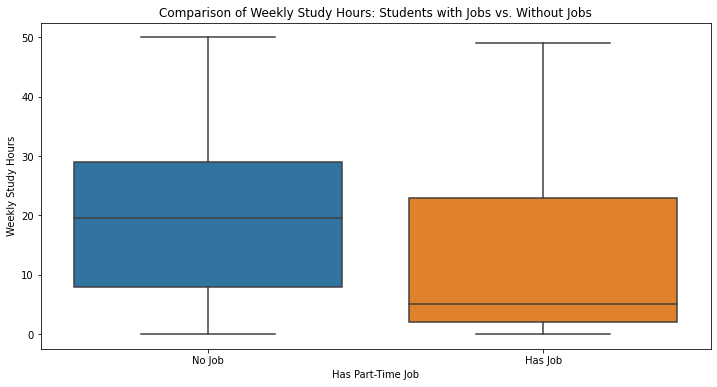

In [13]:
# Chart to show relationship between study time and part time job
plt.figure(figsize=(12, 6))

sns.boxplot(x='part_time_job', y='weekly_self_study_hours', data=data)


plt.title('Comparison of Weekly Study Hours: Students with Jobs vs. Without Jobs')
plt.xlabel('Has Part-Time Job')
plt.ylabel('Weekly Study Hours')
plt.xticks(ticks=[0, 1], labels=['No Job', 'Has Job'])  


plt.show() 

In [14]:
no_job_study_hours = data[data['part_time_job'] == False]['weekly_self_study_hours']
job_study_hours = data[data['part_time_job'] == True]['weekly_self_study_hours']


In [15]:
t_stat, p_value = stats.ttest_ind(no_job_study_hours, job_study_hours, equal_var=False)

In [16]:
print(t_stat)
print("---------")
print(p_value)

9.510055160957341
---------
1.3615577810400382e-19


Hypothesis 1: Students with no part-time job have more time to study:

The t-statistic is 9.51 and the p-value is 1.36e-19.
This very low p-value indicates a statistically significant difference in study hours between students with and without part-time jobs. Specifically, students without part-time jobs tend to study more.

Hypothesis 2

H0: There is no difference in performance of students who spend more time studying and those who do not

H1: Students who study more tend to pass their exams.

In [17]:
data['passing_high_threshold'] = np.where(data['average_score'] > 70, True, False)

In [18]:
passed_study_hours = data[data['passing_high_threshold'] == True]['weekly_self_study_hours']
failed_study_hours = data[data['passing_high_threshold'] == False]['weekly_self_study_hours']

([<matplotlib.axis.XTick at 0x21171be4e80>,
 [Text(0, 0, 'Failed'), Text(1, 0, 'Passed')])

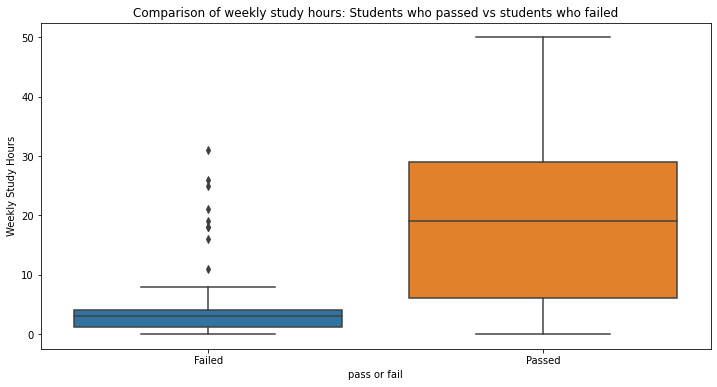

In [19]:
plt.figure(figsize=(12, 6))

sns.boxplot(y='weekly_self_study_hours', x='passing_high_threshold', data=data)


plt.title('Comparison of weekly study hours: Students who passed vs students who failed')
plt.xlabel('pass or fail')
plt.ylabel('Weekly Study Hours')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Passed'])  

In [20]:
if len(failed_study_hours) > 0:
    
    t_stat_study, p_value_study = stats.ttest_ind(passed_study_hours, failed_study_hours, equal_var=False)
else:
    t_stat_study, p_value_study = None, None

In [21]:
print("\nHypothesis 2 Results:")
if t_stat_study is not None:
    print(f"T-statistic: {t_stat_study}, P-value: {p_value_study}")
else:
    print("No failing students available for comparison.")


Hypothesis 2 Results:
T-statistic: 20.44314871150218, P-value: 6.235056279671947e-42


T-statistic: 20.44, which is a very high value. This suggests a significant difference between the two groups.
P-value: 6.24e-42, which is extremely low (much lower than the common alpha levels of 0.05 or 0.01). This means you can reject the null hypothesis that there is no difference in self-study hours between passing and failing students.

The results suggest a strong positive correlation between the amount of self-study hours and the likelihood of passing, which supports the hypothesis that students who study more are more likely to achieve higher scores

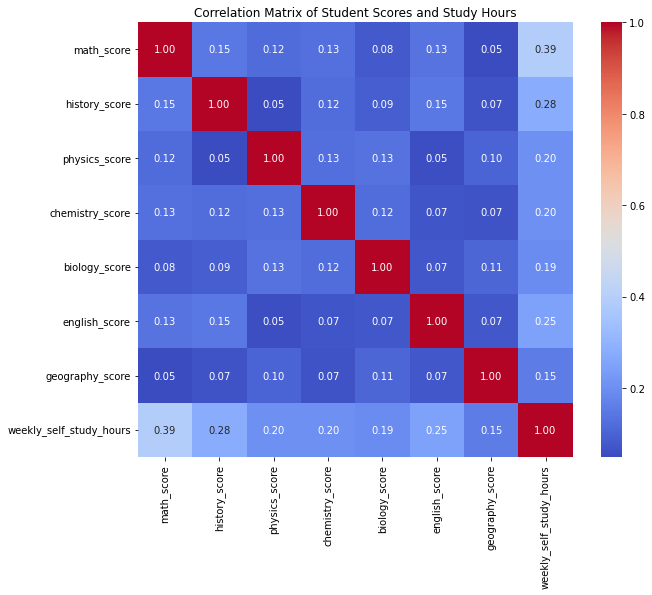

In [22]:
correlation_matrix = data[subjects + ['weekly_self_study_hours']].corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Matrix of Student Scores and Study Hours')
plt.show()

In [23]:

print(data['career_aspiration'].unique())
print("----------------------")
print(data["career_aspiration"].value_counts())

['Lawyer' 'Doctor' 'Government Officer' 'Artist' 'Unknown'
 'Software Engineer' 'Teacher' 'Business Owner' 'Scientist' 'Banker'
 'Writer' 'Accountant' 'Designer' 'Construction Engineer' 'Game Developer'
 'Stock Investor' 'Real Estate Developer']
----------------------
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: career_aspiration, dtype: int64


In [24]:
career_grouped = data.groupby('career_aspiration')[subjects].agg(['mean', 'median', 'std'])
career_grouped


math_score                   history_score         \
                            mean median        std          mean median   
career_aspiration                                                         
Accountant             87.357143   87.0   7.885647     79.666667   80.5   
Artist                 80.119403   81.0  12.136250     81.104478   80.0   
Banker                 87.082840   87.0   7.527268     81.207101   83.0   
Business Owner         69.644013   70.0  17.626062     73.080906   71.0   
Construction Engineer  89.720588   89.5   5.896737     80.985294   81.5   
Designer               82.357143   82.5  11.429513     78.732143   76.5   
Doctor                 92.025210   92.0   5.401604     86.731092   89.0   
Game Developer         89.952381   89.0   6.284719     76.920635   76.0   
Government Officer     80.655738   83.0  11.494760     83.754098   85.0   
Lawyer                 86.036232   86.5   9.134366     89.188406   89.0   
Real Estate Developer  76.421687   77.0  15.239647     80.048193   81.0   
Scientist              87.666667   86.0   7.266844     79.307692   81.0   
Software Engineer      92.146032   92.0   4.603821     81.355556   82.0   
Stock Investor         88.109589   89.0   7.463916     80.356164   81.0   
Teacher                78.593220   80.0  11.871610     79.118644   79.0   
Unknown                79.843049   80.0  12.368863     79.713004   79.0   
Writer                 78.312500   77.0  10.798559     84.750000   86.0   

                                 physics_score                    \
                             std          mean median        std   
career_aspiration                                                  
Accountant             11.550238     81.436508   83.5  12.163221   
Artist                 11.978686     80.044776   79.0  11.343711   
Banker                 11.874280     79.165680   78.0  11.305119   
Business Owner         15.643240     74.368932   74.0  14.380716   
Construction Engineer  12.448692     90.588235   91.0   6.253919   
Designer               11.614241     82.821429   86.0  11.758335   
Doctor                 10.091696     91.974790   93.0   5.674000   
Game Developer         12.239942     91.015873   91.0   5.771152   
Government Officer     10.254521     80.377049   83.0  12.062565   
Lawyer                  5.644648     80.275362   80.5  12.267557   
Real Estate Developer  11.523998     81.734940   81.0  12.207639   
Scientist              12.471344     91.897436   93.0   5.820991   
Software Engineer      11.963610     81.149206   82.0  11.616481   
Stock Investor         11.256319     80.013699   81.0  11.687473   
Teacher                12.833261     79.966102   79.0  12.022918   
Unknown                11.834754     80.946188   81.0  11.990115   
Writer                  9.486833     84.125000   83.5  11.891309   

                      chemistry_score  ...            biology_score         \
                                 mean  ...        std          mean median   
career_aspiration                      ...                                   
Accountant                  81.325397  ...  10.905286     65.682540   68.0   
Artist                      81.119403  ...  12.377304     82.000000   82.0   
Banker                      79.189349  ...  12.294487     79.390533   79.0   
Business Owner              74.650485  ...  14.793410     74.427184   75.0   
Construction Engineer       78.617647  ...  12.983376     83.161765   84.0   
Designer                    79.767857  ...  12.707895     85.589286   85.0   
Doctor                      91.747899  ...   5.222537     92.529412   92.0   
Game Developer              78.746032  ...  11.712921     79.285714   79.0   
Government Officer          79.229508  ...  11.572083     80.918033   81.0   
Lawyer                      80.434783  ...  11.843232     81.847826   83.0   
Real Estate Developer       80.084337  ...  12.588424     78.602410   78.0   
Scientist                   91.076923  ...   5.810085     88.923077 

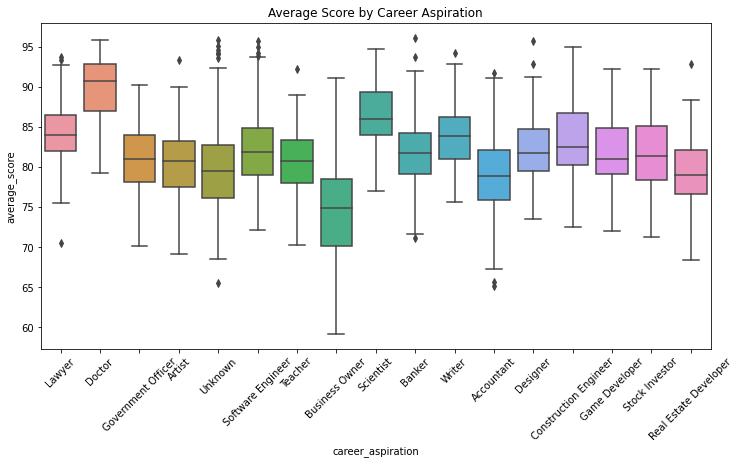

In [25]:

data['average_score'] = data[subjects].mean(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(x='career_aspiration', y='average_score', data=data)
plt.title('Average Score by Career Aspiration')
plt.xticks(rotation=45)
plt.show()

ANOVA Results:
F-statistic: 72.82782967522313, P-value: 1.6905281094180184e-185


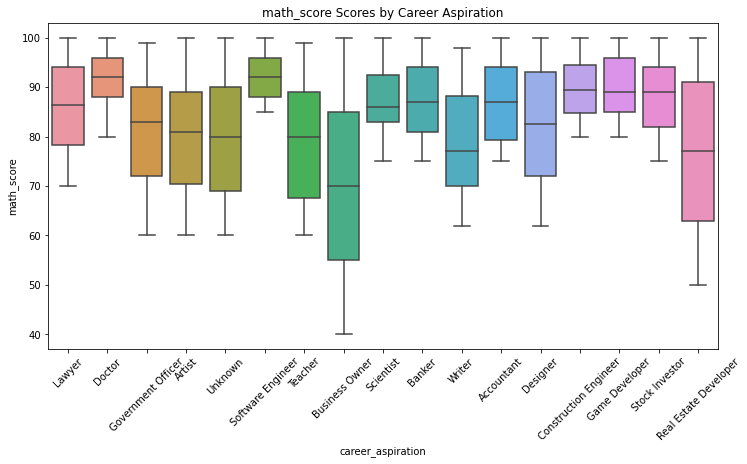

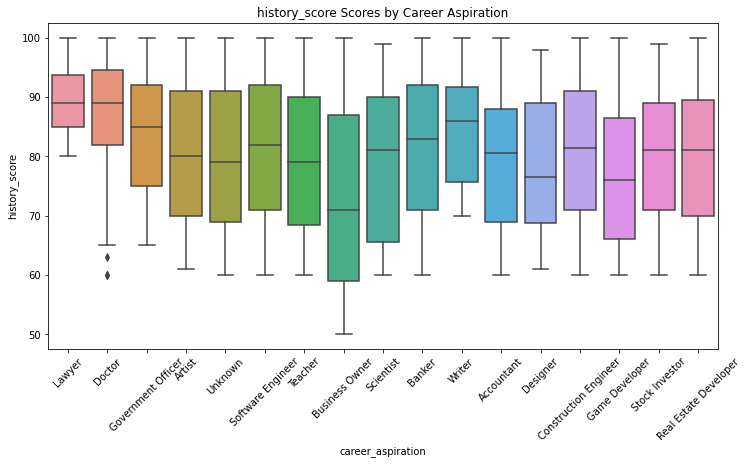

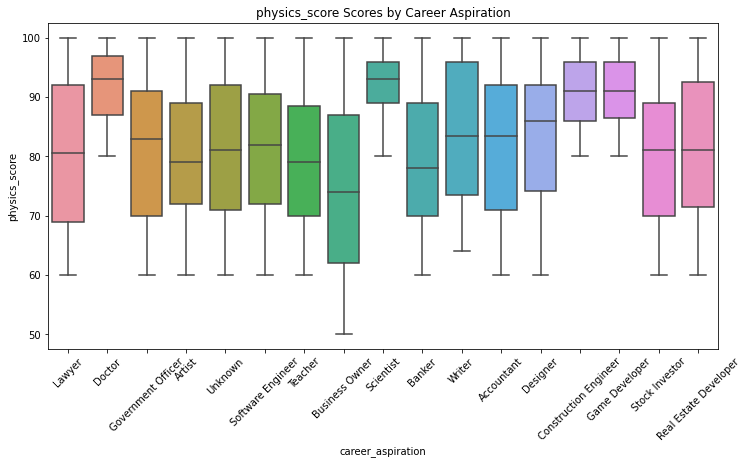

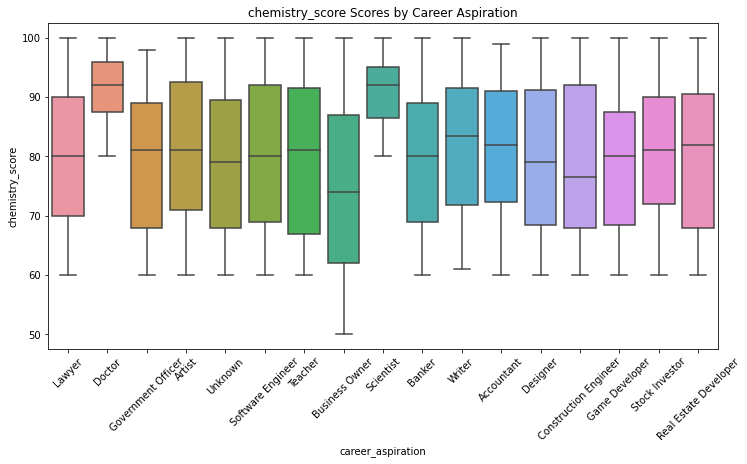

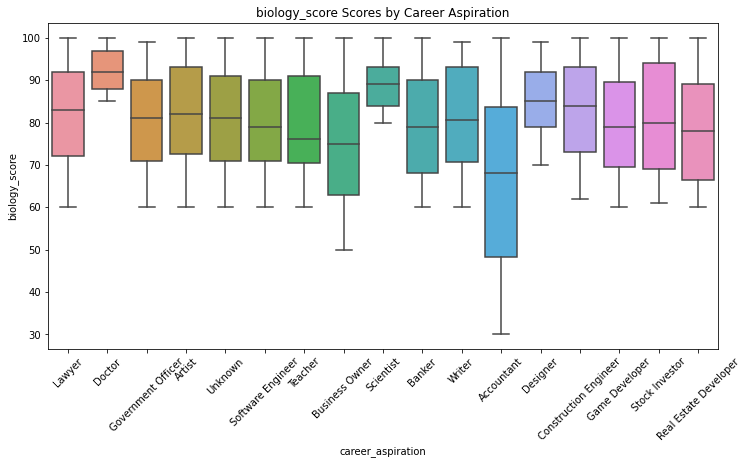

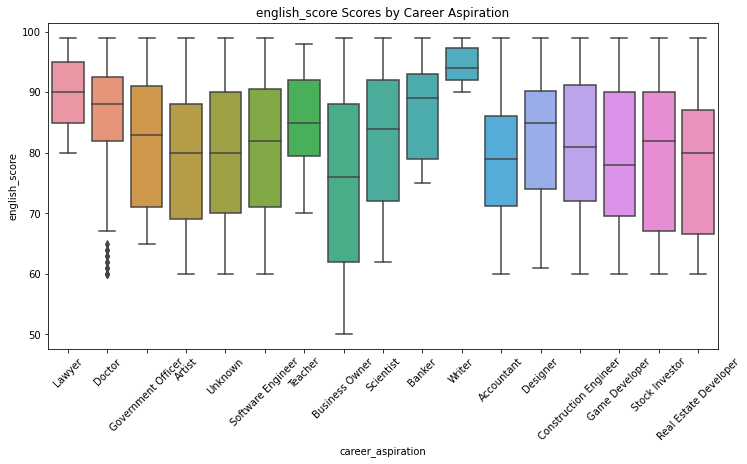

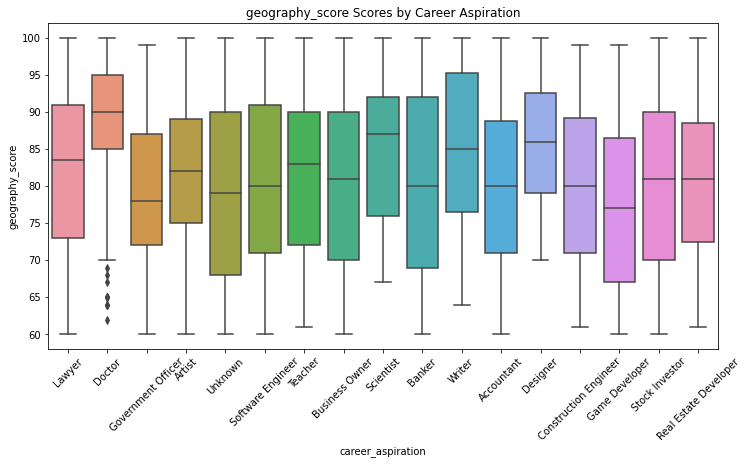

In [26]:

anova_result = stats.f_oneway(*[group['average_score'].values for name, group in data.groupby('career_aspiration')])

print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")


for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='career_aspiration', y=subject, data=data)
    plt.title(f'{subject} Scores by Career Aspiration')
    plt.xticks(rotation=45)
    plt.show()

Mean Study Hours (In Extracurricular): 16.497549019607842
Mean Study Hours (No Extracurricular): 18.07788944723618

Extracurricular Activities Analysis Results:
T-statistic: -2.450548855024658, P-value: 0.014519351670294415


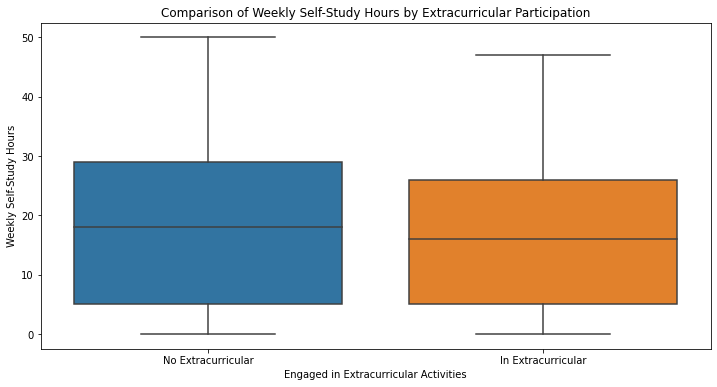

In [27]:
extracurricular_study_hours = data[data['extracurricular_activities'] == True]['weekly_self_study_hours']
no_extracurricular_study_hours = data[data['extracurricular_activities'] == False]['weekly_self_study_hours']


mean_extracurricular_study_hours = extracurricular_study_hours.mean()
mean_no_extracurricular_study_hours = no_extracurricular_study_hours.mean()

print(f"Mean Study Hours (In Extracurricular): {mean_extracurricular_study_hours}")
print(f"Mean Study Hours (No Extracurricular): {mean_no_extracurricular_study_hours}")


t_stat_extracurricular, p_value_extracurricular = stats.ttest_ind(
    extracurricular_study_hours, no_extracurricular_study_hours, equal_var=False
)


print("\nExtracurricular Activities Analysis Results:")
print(f"T-statistic: {t_stat_extracurricular}, P-value: {p_value_extracurricular}")


plt.figure(figsize=(12, 6))
sns.boxplot(x='extracurricular_activities', y='weekly_self_study_hours', data=data)
plt.title('Comparison of Weekly Self-Study Hours by Extracurricular Participation')
plt.xlabel('Engaged in Extracurricular Activities')
plt.ylabel('Weekly Self-Study Hours')
plt.xticks(ticks=[0, 1], labels=['No Extracurricular', 'In Extracurricular'])  
plt.show()


Passing Rate (In Extracurricular): 55.64%
Passing Rate (No Extracurricular): 56.91%


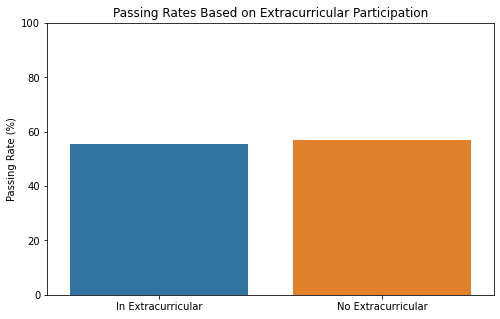

In [28]:
data['passing_high_threshold'] = np.where(data['average_score'] > 80, True, False)

passing_extracurricular = data[data['extracurricular_activities'] == True]['passing_high_threshold']
passing_no_extracurricular = data[data['extracurricular_activities'] == False]['passing_high_threshold']

# Calculate passing rates
pass_rate_extracurricular = passing_extracurricular.mean() * 100
pass_rate_no_extracurricular = passing_no_extracurricular.mean() * 100

print(f"Passing Rate (In Extracurricular): {pass_rate_extracurricular:.2f}%")
print(f"Passing Rate (No Extracurricular): {pass_rate_no_extracurricular:.2f}%")

# Create a bar plot for passing rates
passing_rates = [pass_rate_extracurricular, pass_rate_no_extracurricular]
labels = ['In Extracurricular', 'No Extracurricular']

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=passing_rates)
plt.title('Passing Rates Based on Extracurricular Participation')
plt.ylabel('Passing Rate (%)')
plt.ylim(0, 100)
plt.show()

In [29]:

absent_days_desc = data['absence_days'].describe()
print("Descriptive Statistics of Absent Days:")
print(absent_days_desc)

Descriptive Statistics of Absent Days:
count    2000.000000
mean        3.665500
std         2.629271
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: absence_days, dtype: float64


In [30]:

correlation = data[['absence_days', 'average_score']].corr().iloc[0, 1]
print(f"\nCorrelation between Absent Days and Average Score: {correlation:.2f}")


Correlation between Absent Days and Average Score: -0.23


In [31]:

high_absenteeism_threshold = 5
data['high_absent'] = np.where(data['absence_days'] > high_absenteeism_threshold, True, False)

mean_high_absent_score = data[data['high_absent']]['average_score'].mean()
mean_low_absent_score = data[~data['high_absent']]['average_score'].mean()

print(f"Mean Score for High Absenteeism (> {high_absenteeism_threshold} days): {mean_high_absent_score:.2f}")
print(f"Mean Score for Low Absenteeism (<= {high_absenteeism_threshold} days): {mean_low_absent_score:.2f}")



Mean Score for High Absenteeism (> 5 days): 78.28
Mean Score for Low Absenteeism (<= 5 days): 81.79



Absent Days Analysis Results:
T-statistic: -10.16, P-value: 1.31e-22


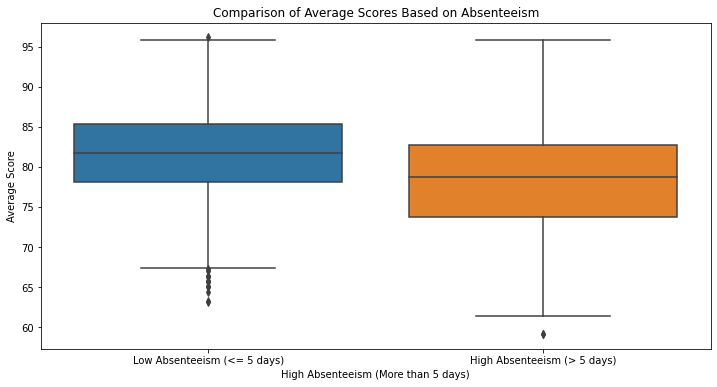

In [32]:

t_stat_absent, p_value_absent = stats.ttest_ind(
    data[data['high_absent']]['average_score'],
    data[~data['high_absent']]['average_score'],
    equal_var=False
)

print("\nAbsent Days Analysis Results:")
print(f"T-statistic: {t_stat_absent:.2f}, P-value: {p_value_absent:.2e}")

plt.figure(figsize=(12, 6))
sns.boxplot(x='high_absent', y='average_score', data=data)
plt.title('Comparison of Average Scores Based on Absenteeism')
plt.xlabel('High Absenteeism (More than 5 days)')
plt.ylabel('Average Score')
plt.xticks(ticks=[0, 1], labels=['Low Absenteeism (<= 5 days)', 'High Absenteeism (> 5 days)'])
plt.show()



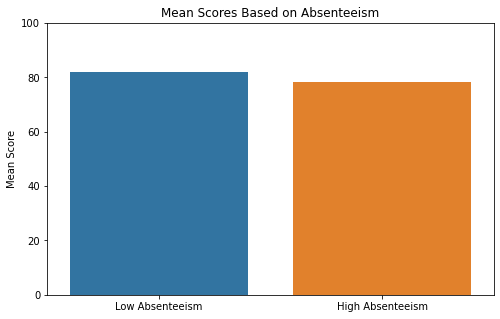

In [33]:

mean_scores = [mean_low_absent_score, mean_high_absent_score]
labels = ['Low Absenteeism', 'High Absenteeism']

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=mean_scores)
plt.title('Mean Scores Based on Absenteeism')
plt.ylabel('Mean Score')
plt.ylim(0, 100)
plt.show()

MODEL BUILDING

In [34]:
features = ['part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
            'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score']
target = 'passing_high_threshold'

In [35]:

X = data[features]
y = data[target]

In [36]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
X['part_time_job'] = le.fit_transform(X['part_time_job'])
X['extracurricular_activities'] = le.fit_transform(X['extracurricular_activities'])

X.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21716\4095560116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['part_time_job'] = le.fit_transform(X['part_time_job'])
C:\Users\user\AppData\Local\Temp\ipykernel_21716\4095560116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['extracurricular_activities'] = le.fit_transform(X['extracurricular_activities'])


,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,0,3,0,27,73,81,93,97,63,80,87
1,0,2,0,47,90,86,96,100,90,88,90
2,0,9,1,13,81,97,95,96,65,77,94
3,0,5,0,3,71,74,88,80,89,63,86
4,0,5,0,10,84,77,65,65,80,74,76


In [37]:
y = le.fit_transform(y)
y = pd.DataFrame(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

y_pred_logreg = logreg_model.predict(X_test_scaled)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
y_pred_logreg_train = logreg_model.predict(X_train_scaled)

In [42]:
print("train f1_score :", f1_score(y_train,y_pred_logreg_train))
print("test f1_score :", f1_score(y_test,y_pred_logreg))

train f1_score : 0.9988950276243094
test f1_score : 0.9977924944812362


In [43]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:

y_pred_rf_train = rf_model.predict(X_train)

In [45]:
print("train_rf f1_score :", f1_score(y_train,y_pred_rf_train))
print("test_rf f1_score :", f1_score(y_test,y_pred_rf))

train_rf f1_score : 1.0
test_rf f1_score : 0.9330453563714902


In [46]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [47]:
gb_train_preds = gb_model.predict(X_train_scaled)
gb_test_preds = gb_model.predict(X_test_scaled)

In [48]:
gb_train_f1 = f1_score(y_train, gb_train_preds)
gb_test_f1 = f1_score(y_test, gb_test_preds)


In [49]:
print("\nGradient Boosting F1 Scores:")
print(f"Train F1 Score: {gb_train_f1:.4f}, Test F1 Score: {gb_test_f1:.4f}")


Gradient Boosting F1 Scores:
Train F1 Score: 0.9956, Test F1 Score: 0.9339


In [50]:
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=RandomForestClassifier(random_state=42)
)

In [51]:
stacking_model.fit(X_train_scaled, y_train)

stacking_train_preds = stacking_model.predict(X_train_scaled)
stacking_test_preds = stacking_model.predict(X_test_scaled)


c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [52]:
stacking_train_f1 = f1_score(y_train, stacking_train_preds)
stacking_test_f1 = f1_score(y_test, stacking_test_preds)

In [53]:
print("\nStacking Model F1 Scores:")
print(f"Train F1 Score: {stacking_train_f1:.4f}, Test F1 Score: {stacking_test_f1:.4f}")


Stacking Model F1 Scores:
Train F1 Score: 0.9989, Test F1 Score: 0.9412


In [54]:
models = {"MODELS":["LinearClassifier", "RandomForestClassifier", "GradientBoostingClassifier", "StackedModel"], 
          "F1 Score Train":[f1_score(y_train,y_pred_logreg_train), f1_score(y_train,y_pred_rf_train), gb_train_f1, stacking_train_f1],
          "F1 Score Test": [f1_score(y_test,y_pred_logreg),f1_score(y_test,y_pred_rf), gb_test_f1, stacking_test_f1]}

In [55]:
models = pd.DataFrame(models)
models

,MODELS,F1 Score Train,F1 Score Test
0,LinearClassifier,0.998895,0.997792
1,RandomForestClassifier,1.000000,0.933045
2,GradientBoostingClassifier,0.995590,0.933902
3,StackedModel,0.998896,0.941176


In [56]:
data.head()

,id,gender,part_time_job,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,absence_days,average_score,passing,passing_high_threshold,high_absent
0,1,male,False,False,27,Lawyer,73,81,93,97,63,80,87,3,82.000000,True,True,False
1,2,female,False,False,47,Doctor,90,86,96,100,90,88,90,2,91.428571,True,True,False
2,3,female,False,True,13,Government Officer,81,97,95,96,65,77,94,9,86.428571,True,True,True
3,4,female,False,False,3,Artist,71,74,88,80,89,63,86,5,78.714286,True,False,False
4,5,male,False,False,10,Unknown,84,77,65,65,80,74,76,5,74.428571,True,False,False


In [57]:
import joblib
# Assuming 'stacked_model' is your trained model
joblib.dump(stacking_model, 'stacked_model.pkl')


['stacked_model.pkl']

In [58]:
data.columns

Index(['id', 'gender', 'part_time_job', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score', 'absence_days', 'average_score',
       'passing', 'passing_high_threshold', 'high_absent'],
      dtype='object')